In [1]:
import os
import json
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation, Embedding

In [2]:
data_directory = r"D:\Courses\0\1 Programming\Music-Generation-using-deep-learning-main\data/"
# D:\Courses\0\1 Programming\Music-Generation-using-deep-learning-main
data_file = r"input.txt"
charIndex_json = "char_to_idx.json"
model_weights_directory = r'D:\Courses\0\1 Programming\Music-Generation-using-deep-learning-main\model/'
BATCH_SIZE = 16
SEQ_LENGTH = 64

In [3]:
def make_model(unique_chars):
    model = Sequential()
    
    model.add(Embedding(input_dim = unique_chars, output_dim = 512, batch_input_shape = (1, 1))) 
  
    model.add(LSTM(256, return_sequences = True, stateful = True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(256, return_sequences = True, stateful = True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(256, stateful = True)) 
    #remember, that here we haven't given return_sequences = True because here we will give only one character to generate the
    #sequence. In the end, we just have to get one output which is equivalent to getting output at the last time-stamp. So, here
    #in last layer there is no need of giving return sequences = True.
    model.add(Dropout(0.2))
    
    model.add((Dense(unique_chars)))
    model.add(Activation("softmax"))
    
    return model

In [4]:
def generate_sequence(epoch_num, initial_index, seq_length):
    with open(os.path.join(data_directory, charIndex_json)) as f:
        char_to_index = json.load(f)
    index_to_char = {i:ch for ch, i in char_to_index.items()}
    unique_chars = len(index_to_char)
    
    model = make_model(unique_chars)
    model.load_weights(model_weights_directory + "weights.{}.h5".format(epoch_num))
     
    sequence_index = [initial_index]
    
    probability_matrix = []
    for _ in range(seq_length):
        batch = np.zeros((1, 1))
        batch[0, 0] = sequence_index[-1]
        
        predicted_probs = model.predict_on_batch(batch).ravel()
        
        probability_matrix.append(predicted_probs)

        sample = np.random.choice(range(unique_chars), size = 1, p = predicted_probs)
        #print(sample)
        sequence_index.append(sample[0])
    
    seq = ''.join(index_to_char[c] for c in sequence_index)
    
    cnt = 0
    for i in seq:
        cnt += 1
        if i == "\n":
            break
    seq1 = seq[cnt:]
    #above code is for ignoring the starting string of a generated sequence. This is because we are passing any arbitrary 
    #character to the model for generating music. Now, the model start generating sequence from that character itself which we 
    #have passed, so first few characters before "\n" contains meaningless word. Model start generating the music rhythm from
    #next line onwards. The correct sequence it start generating from next line onwards which we are considering.
    
    cnt = 0
    for i in seq1:
        cnt += 1
        if i == "\n" and seq1[cnt] == "\n":
            break
    seq2 = seq1[:cnt]
    #Now our data contains three newline characters after every tune. So, the model has leart that too. So, above code is used for
    #ignoring all the characters that model has generated after three new line characters. So, here we are considering only one
    #tune of music at a time and finally we are returning it..
    
    return seq2,probability_matrix, seq

In [5]:
ep = int(input("1. Enter the epoch number of the model you want to load. Small number will generate more errors in music: "))
ar = int(input("\n2. Enter any number between 0 to 86 which will be given as initial charcter to model for generating sequence: "))
ln = int(input("\n3. Enter the length of music sequence you want to generate. Typical number is between 300-600. Too small number will generate hardly generate any sequence: "))

music,probability_matrix,originalSequence = generate_sequence(ep, ar, ln)

print("\nMUSIC SEQUENCE GENERATED: \n")

print(originalSequence)
print('\n\n\nFinal Output')
print(music)

1. Enter the epoch number of the model you want to load. Small number will generate more errors in music:  102

2. Enter any number between 0 to 86 which will be given as initial charcter to model for generating sequence:  80

3. Enter the length of music sequence you want to generate. Typical number is between 300-600. Too small number will generate hardly generate any sequence:  500



MUSIC SEQUENCE GENERATED: 

voow~k~ule)st=Roalley's Wife
% Nottingham Music Database
S:Kevin Briggs, via EF
M:6/8
K:D
P:A
A|"D"ded dAF|"Em"Ade "A7"A2G|"D"FGA Adf|"Em"f3 "A7"e2G|
"D"FGA A2d|"G"BGB "A"A2E|"A7"ABc "G"dcB|"D"AFA AFD|
"D"Add dcd|"D"ABA "A7"AGF|"D"FDD D2D|"A7"E3 E2A|
"D"FGA d2e|"D"dcd "A"e2A|"Bm"dcB "D"A2f|"Em"gfg "A7"e2A|
"D"dfA def|"G"gbg "A7"efg|"D"aba fdf|"D"aba ffd|"A7"cAA Aag|
"D"fdd def|"G"gba "A7"gfe|"D"afd "G"g2B|"D"Add d2:|
P:B
A/2G/2|"D"FAF FAF|"G"GBd GBd|"D"AFA "A7"ABc|"D"dAF D2:|


X: 116
T:Hamter La



Final Output
% Nottingham Music Database
S:Kevin Briggs, via EF
M:6/8
K:D
P:A
A|"D"ded dAF|"Em"Ade "A7"A2G|"D"FGA Adf|"Em"f3 "A7"e2G|
"D"FGA A2d|"G"BGB "A"A2E|"A7"ABc "G"dcB|"D"AFA AFD|
"D"Add dcd|"D"ABA "A7"AGF|"D"FDD D2D|"A7"E3 E2A|
"D"FGA d2e|"D"dcd "A"e2A|"Bm"dcB "D"A2f|"Em"gfg "A7"e2A|
"D"dfA def|"G"gbg "A7"efg|"D"aba fdf|"D"aba ffd|"A7"cAA Aag|
"D"fdd def|"G"gba "A7"gfe|"D"afd "G"g2B|"D"Add d2:|
P:B
A/2G/2|"D"FAF FAF|"G"GBd GBd|"D"AFA "A7"ABc|"D"dAF D2:|



In [6]:
len(music)

198

# **Music Player 🎵** 

In [9]:
m = music.split('L:')
#default value of node length, L must be given
if (len(m) == 1):
    m.insert(0,'L:1/8')
    #print(m)
    #print(''.join(m))
    music = '\n'.join(m)
    f = open('music.abc', 'w')
    f.write(music)
    f.close()
    print(music)
else:
  print("Parameter Sufficinet\n" + music)



print('Musical Player here\n')


Parameter Sufficinet
L:1/8
% Nottingham Music Database
S:Kevin Briggs, via EF
M:6/8
K:D
P:A
A|"D"ded dAF|"Em"Ade "A7"A2G|"D"FGA Adf|"Em"f3 "A7"e2G|
"D"FGA A2d|"G"BGB "A"A2E|"A7"ABc "G"dcB|"D"AFA AFD|
"D"Add dcd|"D"ABA "A7"AGF|"D"FDD D2D|"A7"E3 E2A|
"D"FGA d2e|"D"dcd "A"e2A|"Bm"dcB "D"A2f|"Em"gfg "A7"e2A|
"D"dfA def|"G"gbg "A7"efg|"D"aba fdf|"D"aba ffd|"A7"cAA Aag|
"D"fdd def|"G"gba "A7"gfe|"D"afd "G"g2B|"D"Add d2:|
P:B
A/2G/2|"D"FAF FAF|"G"GBd GBd|"D"AFA "A7"ABc|"D"dAF D2:|

Musical Player here



In [8]:
from music21 import converter
s = converter.parse('music.abc')
s.show('midi')  # or s.write('midi', fp='output.mid')

In [11]:
!pip install music21

You should consider upgrading via the 'c:\users\pramod\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


# **Section: Next Character Probability Chart 📊** 



In [9]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

In [10]:
x_axis_data = []
y_axis_data = []
for i in range(20):

  #print(probability_matrix[i])
  probability_array = probability_matrix[i]
  
  k1 = np.argsort(probability_array)[::-1]
  probability_array.sort()

  #print(k1)
  characterNumeral = list(k1[::9])
  topProbability = list(probability_array[::-1][::9])
  
  characterArray = []
  character = ' '.join(str(e) for e in characterNumeral)
  characterArray= character.split(' ')
  x_axis_data.append(characterArray)
  y_axis_data.append(topProbability)


  # print(characterArray)
  # print(topProbability)
  # print('\n')



In [11]:
dct = {"\n": 0, " ": 1, "!": 2, "\"": 3, "#": 4, "%": 5, "&": 6, "'": 7, "(": 8, ")": 9, "+": 10, ",": 11, "-": 12, ".": 13, "/": 14, "0": 15, "1": 16, "2": 17, "3": 18, "4": 19, "5": 20, "6": 21, "7": 22, "8": 23, "9": 24, ":": 25, "=": 26, ">": 27, "?": 28, "A": 29, "B": 30, "C": 31, "D": 32, "E": 33, "F": 34, "G": 35, "H": 36, "I": 37, "J": 38, "K": 39, "L": 40, "M": 41, "N": 42, "O": 43, "P": 44, "Q": 45, "R": 46, "S": 47, "T": 48, "U": 49, "V": 50, "W": 51, "X": 52, "Y": 53, "[": 54, "\\": 55, "]": 56, "^": 57, "_": 58, "a": 59, "b": 60, "c": 61, "d": 62, "e": 63, "f": 64, "g": 65, "h": 66, "i": 67, "j": 68, "k": 69, "l": 70, "m": 71, "n": 72, "o": 73, "p": 74, "q": 75, "r": 76, "s": 77, "t": 78, "u": 79, "v": 80, "w": 81, "x": 82, "y": 83, "z": 84, "|": 85, "~": 86}


In [12]:
def get_key(val):
    for key, value in dct.items():
         if val == value:
             return key
 
    return "key doesn't exist"
 
# get_key(23)
counter = 0
for j in x_axis_data:
  arr = []
  count = 0
  for i in j:
    #print(i, j)

    arr.append(get_key(int(i)))
    # print(get_key(int(i)))

  x_axis_data[counter] = arr
  count+=1
  counter+=1



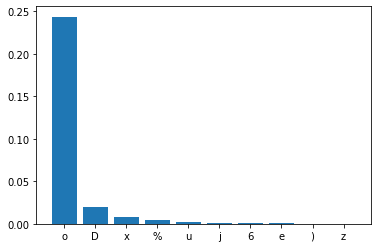

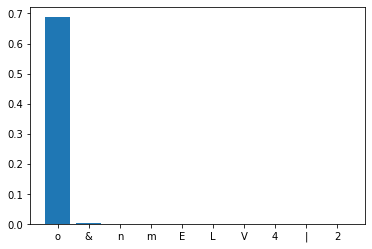

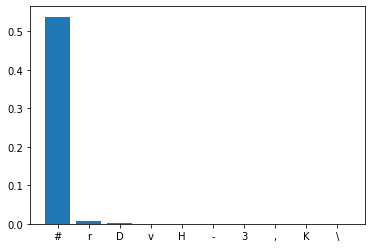

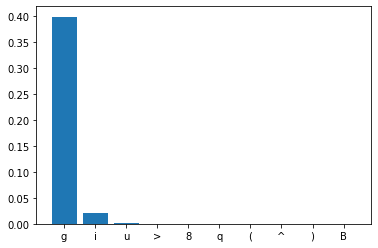

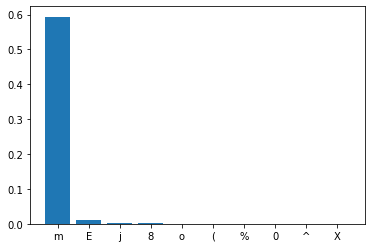

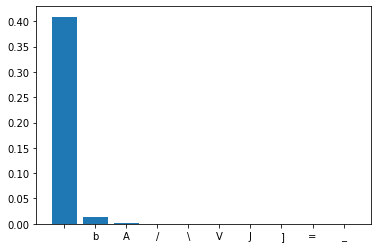

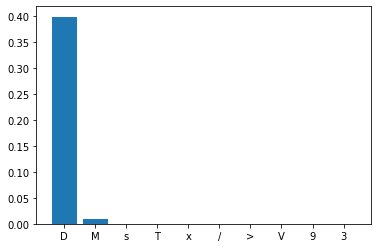

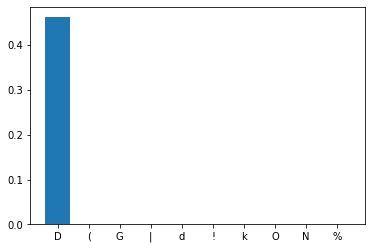

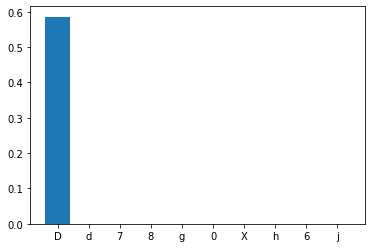

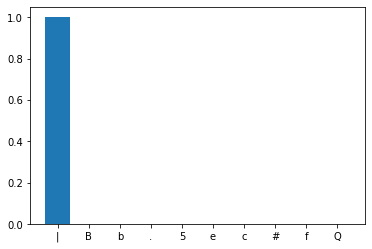

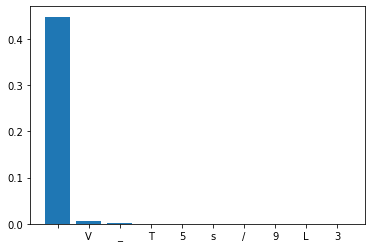

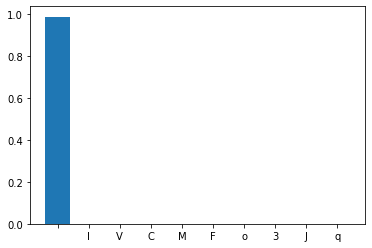

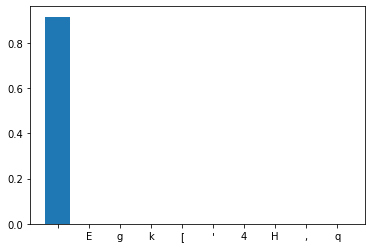

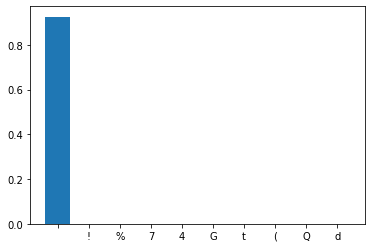

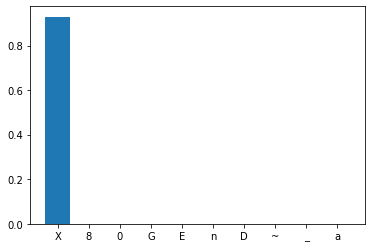

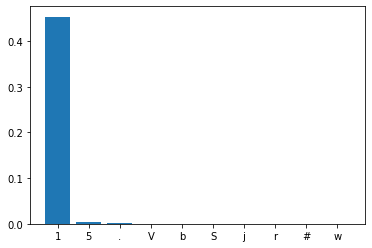

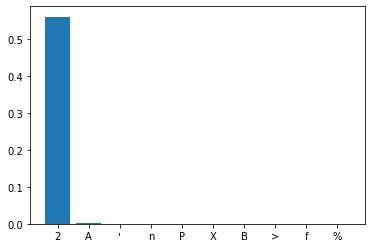

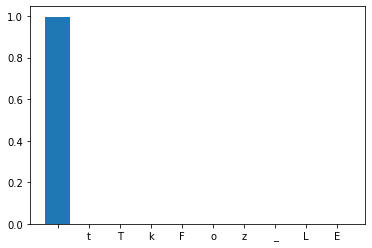

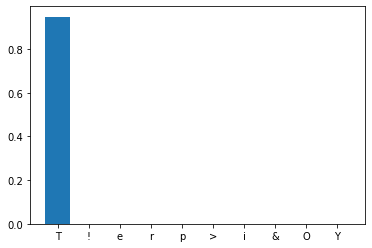

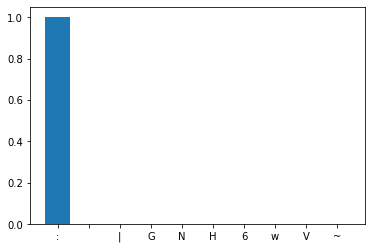

In [13]:
#plt.bar(x_axis_data[2], y_axis_data[2])

for i in range(len(x_axis_data)):
  plt.bar(x_axis_data[i], y_axis_data[i])
  plt.show()